In [1]:
#project: p1
#submitter: kmconrad3
#partner: none
#hours: 6

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x<minimum<maximum # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:]
suffix_match == 'esque'

True

In [5]:
#q4
def add(x,y=1):
    return x+y

add(3,4)   

7

In [6]:
#q5
add(9)

10

In [7]:
#q6
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [8]:
#q7
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

def smart_count(listy):
    sum=0
    for x in listy:
        if x<=10 and x>0:
            sum+=x
        elif x<0:
            break
    
    return sum

smart_count(nums)

3
4
1
6


14

In [9]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [10]:
#q9
header = ["A", "B", "C"] 

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1, "z": 3.14}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [11]:
#q10
rows[0][-1]["x"]

8

In [12]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [13]:
#q12
adder=0
for spot in rows:
    adder+=spot[header.index("B")]
    
adder

10007

In [14]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [15]:
#q14
import json
f = open("usd.json")
data = json.load(f)
f.close()

data['eur']['rate']*400

339.962745715148

In [16]:
#q15
def divide(x,y):
    if y==0:
        return float('nan')
    else:
        return x/y
    
divide(3,2)

1.5

In [17]:
#q16
divide(-3,0)

nan

In [18]:
#q17
import os, pandas

years={}
for x in os.listdir("home-computers"):
    if x[:5]=="ACSDT":
        years[int(x[7:11])]= pandas.read_csv(os.path.join("home-computers", x),skiprows=1)
    
sorted(list(years.keys()))

[2013, 2014, 2015, 2016, 2017, 2018]

In [19]:
#q18
df = years[2018]
df.loc[df["Geographic Area Name"]=="Wisconsin","Estimate!!Total"].values[0]

2371960

In [20]:
#q19
sum(df["Estimate!!Total!!No Computer"])

10285814

In [21]:
#q20
(df["Margin of Error!!Total!!No Computer"]/df["Estimate!!Total!!No Computer"]).max()

0.12375641594322287

In [22]:
#q21
states=["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
percentnocomp = {}
for state in states:
    total = df.loc[df["Geographic Area Name"]== state,"Estimate!!Total"].values[0]
    num_no_computer = df.loc[df["Geographic Area Name"]== state,"Estimate!!Total!!No Computer"].values[0]
    percentnocomp[state] = (num_no_computer/total)*100

percentnocomp

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

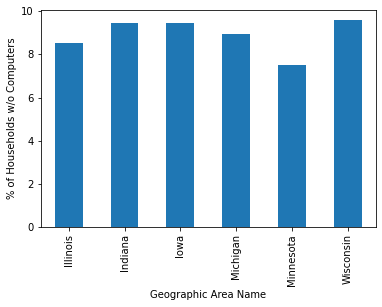

In [23]:
#q22
p22 = pandas.Series(percentnocomp).plot.bar()
p22.set_xlabel("Geographic Area Name")
p22.set_ylabel("% of Households w/o Computers")
p22

<AxesSubplot:xlabel='Year', ylabel='WI Households without Computers (thousands)'>

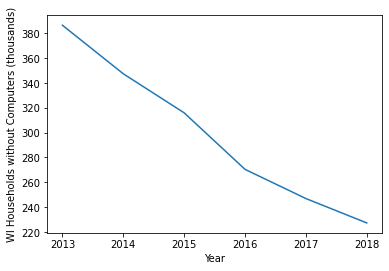

In [24]:
#q23
tabrelation = {}
for year in sorted(list(years.keys())):
    df = years[year]
    num = df.loc[df["Geographic Area Name"]== "Wisconsin","Estimate!!Total!!No Computer"].values[0]
    tabrelation[year] = num/1000
    
tabrelationgraph = pandas.Series(tabrelation).plot.line()
tabrelationgraph.set_xlabel("Year")
tabrelationgraph.set_ylabel("WI Households without Computers (thousands)")
tabrelationgraph

<AxesSubplot:xlabel='Smartphones(millions)', ylabel='Tablets(millions)'>

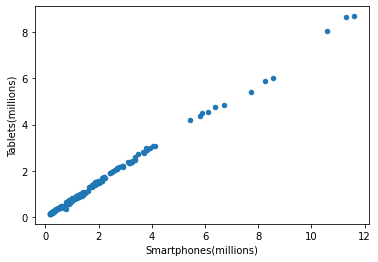

In [25]:
#q24
q24_dict = {}
phones = []
tablets = []
for year in sorted(list(years.keys())):
    df = years[year]
    if "Estimate!!Total!!Has one or more types of computing devices!!Smartphone" in df.columns and "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer" in df.columns:
        phones += list(df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"])
        tablets+=list(df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"])
s1 = pandas.Series(phones)/1000000
s2 = pandas.Series(tablets)/1000000
df = pandas.DataFrame({
    "Smartphones(millions)": s1,
    "Tablets(millions)": s2
})
df.plot.scatter(x = "Smartphones(millions)",y="Tablets(millions)")

In [26]:
#q25
from subprocess import check_output
gitlogoutput = str(check_output(["git","log"], cwd="cs320-p1"),encoding="utf-8")
gitlogoutput.partition('\n')[0]

'commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'

In [27]:
#q26
commitnums=[]  
for x in gitlogoutput.split('\n\ncommit '):
    if x== gitlogoutput.split('\n\ncommit ')[0]:
        commitnums.append((x[7:47]))
    else:
        commitnums.append((x[0:40]))
        
commitnums
# option2: use enumerate next time to loop through both index & values
# option3: for x in gitlogoutput.split('\n'):
#              if x.startswith('commit'):

['4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4',
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4',
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5',
 'f37e610ce055a3d894baac2d9449e6eb77c72320',
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7',
 '761627a3ad9ee681f27211326e9149f01764ceee',
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9',
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe']

In [28]:
#q27
commitfiles = {}
for i in commitnums:
    check_output(["git","checkout",i],cwd="cs320-p1")
    linecount = 0
    f = open('cs320-p1/wc.py')
    lines = list(f)
    f.close
    commitfiles[i] = len(lines)
check_output(["git","checkout","main"],cwd="cs320-p1")

commitfiles

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Previous HEAD position was 4e41283 only make one pass over list to count all
HEAD is now at f637df3 only make one pass over list to count all
Previous HEAD position was f637df3 only make one pass over list to count all
HEAD is now at c10b5a6 optimize: only compute count once per unique word
Previous HEAD position was c10b5a6 optimize: only compute count

{'4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4': 43,
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4': 40,
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5': 40,
 'f37e610ce055a3d894baac2d9449e6eb77c72320': 40,
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7': 39,
 '761627a3ad9ee681f27211326e9149f01764ceee': 35,
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9': 35,
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe': 21}

In [29]:
#q28
import json
f = open('input.txt', "w")
f.write("A B C C")
f.close()
thetext = check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL",])
data = json.loads(thetext)

data

{'A': 1, 'B': 1, 'C': 2}

In [30]:
#q29
commitsnowork=[]
for i in commitnums:
    check_output(["git","checkout",i],cwd="cs320-p1")
    try:
        json.loads(check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL",]))
    except:
        commitsnowork.append(i)
        
check_output(["git","checkout","main"],cwd="cs320-p1")
commitsnowork

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Previous HEAD position was 4e41283 only make one pass over list to count all
HEAD is now at f637df3 only make one pass over list to count all
Traceback (most recent call last):
  File "cs320-p1/wc.py", line 40, in <module>
    main()
  File "cs320-p1/wc.py", line 33, in main
    counts[word] += 1
KeyError: 'A'
Previous HEAD position was f637df3 only mak

['f637df3f45bc389e1035cc3aadcf5d81a55f0dc4']

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
HEAD is now at 4e41283 only make one pass over list to count all
Switched to branch 'main'


<AxesSubplot:xlabel='Words', ylabel='Milliseconds'>

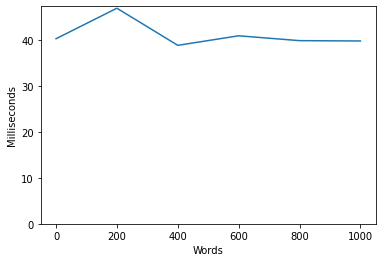

In [31]:
#q30
import time

def fcontenttime(comnum):
    commitgraph = {}
    words=[0,200,400,600,800,1000]

    for x in words:
        check_output(["git","checkout",comnum],cwd="cs320-p1")
        f = open('input.txt','w')
        for i in range(x):
            f.write(str(i)+ "\n")
        f.close()
        time1 = time.time()
        check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL",])
        time2 = time.time()
        timems = (time2-time1)*1000
        commitgraph[x]=timems

    check_output(["git","checkout","main"],cwd="cs320-p1")
    
    tabrelationgraph = pandas.Series(commitgraph).plot(xticks=words)
    tabrelationgraph.set_xlabel("Words")
    tabrelationgraph.set_ylabel("Milliseconds")
    tabrelationgraph.set_ylim(0)
    return tabrelationgraph
    
fcontenttime(commitnums[0])

Note: switching to 'f37e610ce055a3d894baac2d9449e6eb77c72320'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
HEAD is now at f37e610 do not repeatedly re-read file, use with to autom

<AxesSubplot:xlabel='Words', ylabel='Milliseconds'>

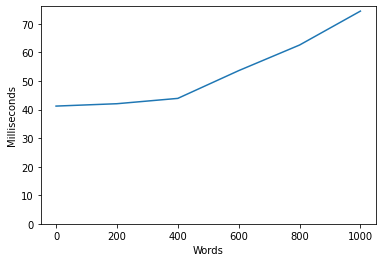

In [32]:
#q31
fcontenttime(commitnums[3])

Note: switching to '6f5ca9327e986315ffcacddce5d9d6195c0913b7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
HEAD is now at 6f5ca93 ignore case, usage line
Previous HEAD position was 6f5ca93 ignore case, usage line
Switched to branch 'main'


<AxesSubplot:xlabel='Words', ylabel='Milliseconds'>

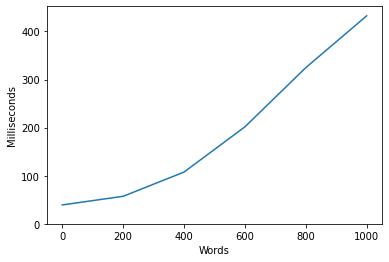

In [33]:
#q32
fcontenttime(commitnums[4])